In [1]:
# Import das bibliotecas
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [2]:
# Carregando o dataset Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist

# Separando os dados de treino e teste
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Escalando os dados
X_train, X_test = X_train/255.0, X_test/255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Adicionando uma camada a mais as imagens (estão em grayscale, aka 2d)
# uma CNN espera dados 3D
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_train.shape

(60000, 28, 28, 1)

In [4]:
# Numero de classes do modelo
K = len(set(y_train))
print(f'Number of classes {K}')

Number of classes 10


In [5]:
# Layers convolucionais da rede
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
# Layers densas da rede
x = Dropout(0.2)(x)
x = Dense(512, activation='relu',)(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax',)(x)

model = Model(i, x)

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
)

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.7413 - loss: 0.7119 - val_accuracy: 0.8457 - val_loss: 0.4030
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8631 - loss: 0.3658 - val_accuracy: 0.8695 - val_loss: 0.3597
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8824 - loss: 0.3088 - val_accuracy: 0.8838 - val_loss: 0.3246
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8954 - loss: 0.2749 - val_accuracy: 0.8732 - val_loss: 0.3383
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9049 - loss: 0.2495 - val_accuracy: 0.8952 - val_loss: 0.2949
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9162 - loss: 0.2200 - val_accuracy: 0.8940 - val_loss: 0.2911
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9215 - loss: 0.2068 - val_accuracy: 0.8971 - val_loss: 0.2886
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9263 - loss: 0.1916 

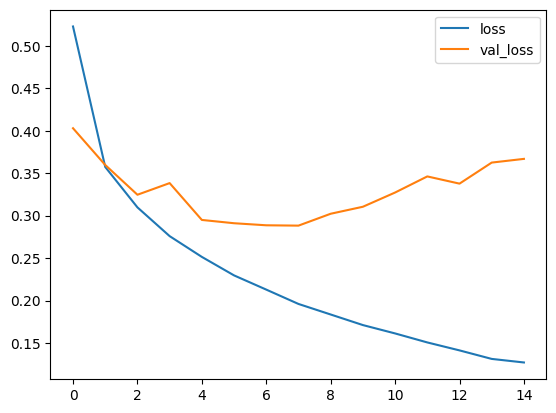

In [7]:
# Plots da função custo por iteração
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

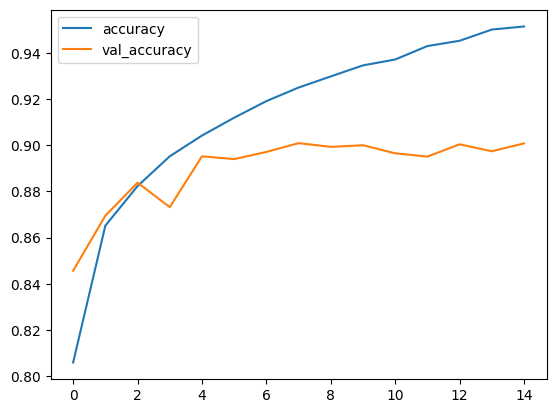

In [8]:
# Plots da precisão por iteração
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion matrix, without normalization
[[867   2  27  17   2   1  80   0   4   0]
 [  2 978   0  15   2   0   2   0   1   0]
 [ 15   0 865   8  57   0  54   0   1   0]
 [ 15   8  25 902  20   2  23   0   4   1]
 [  0   0  53  31 843   0  69   0   4   0]
 [  0   0   0   0   0 986   0  14   0   0]
 [132   1  54  26  79   0 698   0  10   0]
 [  0   0   0   0   0  21   0 968   0  11]
 [  1   2   3   4   5   6   2   3 974   0]
 [  1   0   0   0   0  14   0  58   0 927]]


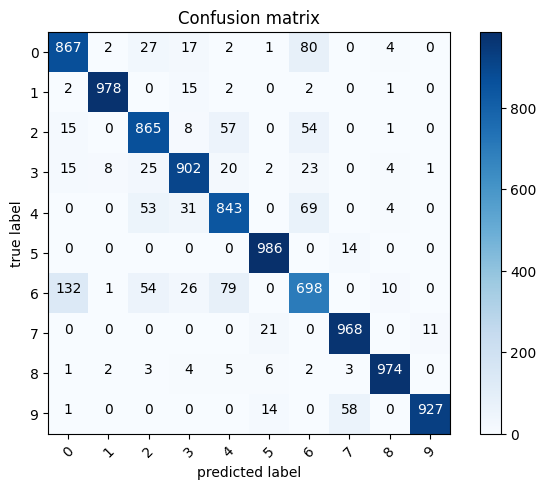

In [17]:
# Plot da matriz de confusão
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  # Verifica se a matriz será nromalizada
  if normalize:
    # Normaliza a matriz (caso necessario)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')



  # Printa a matriz crua
  print(cm)

  # Plot da matriz com matplotlib

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('true label')
  plt.xlabel('predicted label')
  plt.show()


# Gera a matriz com os casos de teste e chama a função
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [18]:
# Mapa de rótulos
labels = ''' T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

Text(0.5, 1.0, 'True label: Shirt\n Predicted: Pullover')

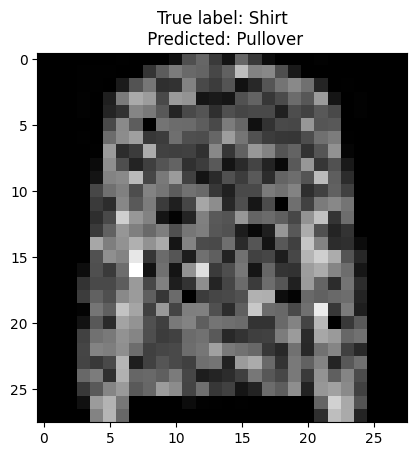

In [28]:
# Separa as predições erradas
missclassified_idx = np.where(p_test != y_test)[0]
# Escolhe uma de forma aleatoria
i = np.random.choice(missclassified_idx)
# Plota mostrando a predição e a classe correta
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.title(f'True label: {labels[y_test[i]]}\n Predicted: {labels[p_test[i]]}')